In [2]:
from timing_reso import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import scipy
from scipy.stats import norm
import os, glob

## Measurement (Max @ Ch) Data

In [3]:
def average_max_times(data):
    data = pd.read_csv(data)

        # print the location and filename

    t1 = np.array(data['X at Max Y(1)'])
    t2 = np.array(data['X at Max Y(4)'])
    
    # filter out problem points / overload
    argument1 = np.where(t1 > 1)
    #argument3 = np.where(t1 < np.quantile(t1,0.01))
    argument2 = np.where(t2 > 1)
    #argument4 = np.where(t2 < np.quantile(t2,0.01))
    
    del_args = np.append(argument1, argument2)
    
    t1_clean = np.delete(t1, del_args)

    t2_clean = np.delete(t2, del_args)
    
    t1_avg = 0
    t2_avg = 0
    
    for i in range(len(t1_clean)):
        t1_avg = t1_avg + t1_clean[i]
        t2_avg = t2_avg + t2_clean[i]
    
    
    time_delay = abs(t1_avg/len(t1)-t2_avg/len(t2))
    print("time delay MAX MEASUREMENTS: {:.3f} ns".format(time_delay * 10 ** 9))
    
    return time_delay
    
    

In [8]:
average_max_times('tests/SNSL_sipm_delay_30.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'tests/SNSL_sipm_delay_30.csv'

# Trace Data

In [7]:
path = 'tests/snsl_sipm_trace_30cm 5'
num_shots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])

In [ ]:
# Graph the pulse
def pulsegraph(pathname): 
    
    # Grab the data
    #data.columns

    csv_files = glob.glob(os.path.join(pathname, "*.csv"))


    # loop over the list of csv files
    for f in csv_files:

        # read the csv file
        data = pd.read_csv(f, skiprows=1)

        # print the location and filename

        p1 = np.array(data['1 (VOLT)'])
        p2 = np.array(data['4 (VOLT)'])
        
        p1 = scipy.ndimage.gaussian_filter(p1, sigma = 5)
        p2 = scipy.ndimage.gaussian_filter(p2, sigma = 5)
        
        time = np.array(data['Time (s)'])
        
        

        plt.xlabel("time (s)")
        plt.ylabel("voltage (v)")
        plt.plot(time, p1,color='orange')
        plt.plot(time, p2,color='black')
        break

    

## Plot all the traces taken

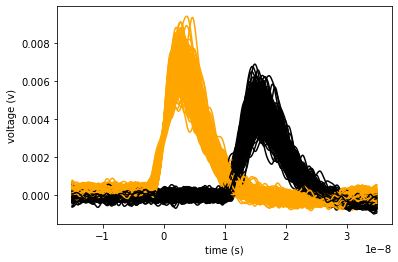

In [15]:
pulsegraph(path)

In [16]:
def average_pulse(pathname, num_trace):
    csv_files = glob.glob(os.path.join(pathname, "*.csv"))
    
    # loop over the list of csv files
    p1_avg = np.zeros(num_trace)
    p2_avg = np.zeros(num_trace)
    
    time = np.array(data_temp['Time (s)'])
    
    for f in csv_files:

        # read the csv file
        data = pd.read_csv(f, skiprows=1)

        p1 = np.array(data['1 (VOLT)'])
        p2 = np.array(data['4 (VOLT)'])
        
        p1_avg = np.add(p1_avg,p1) 
        p2_avg = np.add(p2_avg,p2) 
        
        
    p1_avg = p1_avg / num_trace
    p2_avg = p2_avg / num_trace
    
    return time, p1_avg, p2_avg
        

In [17]:
time, p1_avg, p2_avg = average_pulse(path, num_shots)

## Plot the average wave

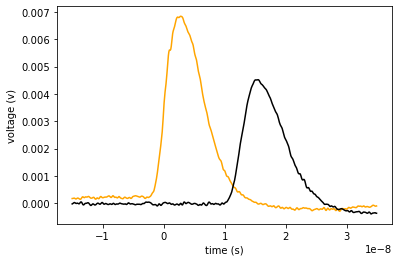

In [18]:
plt.xlabel("time (s)")
plt.ylabel("voltage (v)")
plt.plot(time, p1_avg,color='orange')
plt.plot(time, p2_avg,color='black')
plt.show()

## Gaussian Filtered Average Pulse

In [19]:
sigma = 3

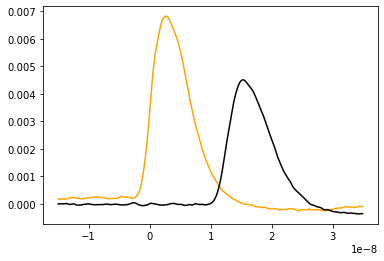

In [20]:
filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)
plt.plot(time, filtered_p1,color='orange')
plt.plot(time, filtered_p2,color='black')
plt.show()

In [21]:
# overlay the pulse with raw data

def overlay(pathname):
    csv_files = glob.glob(os.path.join(pathname, "*.csv"))


    # loop over the list of csv files
    for f in csv_files:

        # read the csv file
        data = pd.read_csv(f, skiprows=1)

        # print the location and filename
        p1 = np.array(data['1 (VOLT)'])
        p2 = np.array(data['4 (VOLT)'])
        time = np.array(data['Time (s)'])

        plt.xlabel("time (s)")
        plt.ylabel("voltage (v)")
        plt.plot(time, p1,color='orange')
        plt.plot(time, p2,color='pink')
        
    filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
    filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)
    plt.plot(time, filtered_p1,color='black', linewidth=2)
    plt.plot(time, filtered_p2,color='black', linewidth=2)
    plt.show()

## Overlay all pulses and average

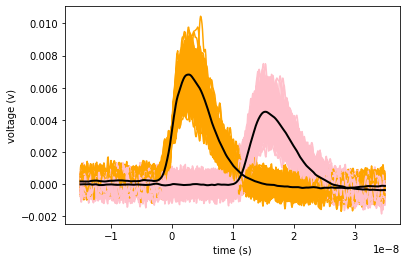

In [22]:
overlay(path)

In [23]:
max_final_p1 = max(filtered_p1)
max_final_p2 = max(filtered_p2)

In [24]:
halfmax_p1 = max_final_p1 * 0.5
halfmax_p2 = max_final_p2 * 0.5

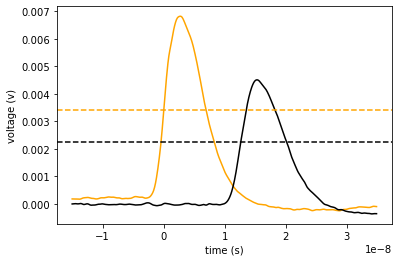

In [25]:
plt.xlabel("time (s)")
plt.ylabel("voltage (v)")
plt.plot(time, filtered_p1,color='orange')
plt.plot(time, filtered_p2,color='black')
plt.axhline(halfmax_p1, color='orange', linestyle='--')
plt.axhline(halfmax_p2, color='black', linestyle='--')
plt.show()

In [43]:
def get_fm(data, fraction):
    frac = max(data) * fraction;
    idxs=[]
    for i in range(len(data)):
        if data[i] > frac:
            idxs.append(i)

    return min(idxs), max(idxs)

In [42]:
def time_delay(time, filtered_p1, filtered_p2, fraction):
    
    f_1_min, f_1_max = get_fm(filtered_p1, fraction)
    f_2_min, f_2_max = get_fm(filtered_p2, fraction)
    
    plt.xlabel("time (s)")
    plt.ylabel("voltage (v)")
    
    plt.plot(time, filtered_p1,color='orange')
    plt.plot(time, filtered_p2,color='black')

    plt.axvline(time[f_1_min], color='orange', linestyle='--')
    #plt.axvline(time[hf_1_max], color='orange', linestyle='--')

    #plt.axvspan(time[hf_1_min], time[hf_1_max], alpha=0.5, color='orange')

    plt.axvline(time[f_2_min], color='black', linestyle='--')
    #plt.axvline(time[hf_2_max], color='black', linestyle='--')

    #plt.axvspan(time[hf_2_min], time[hf_2_max], alpha=0.5, color='black')
    plt.title("Trace Data")
    plt.xlabel("Time (s)")
    plt.ylabel("V")
    
    time_diff = abs(time[f_1_min] - time[f_2_min])
    print("time delay TRACE: {:.3f} ns".format(time_diff * 10 ** 9))

    #time_diff = abs(time[hf_1_max] - time[hf_2_max])
    #print("time delay 2: {:.3f} ns".format(time_diff * 10 ** 9))
    

    plt.show()
    
    return time_diff

## Difference between half maxes of the pulses

time delay TRACE: 12.578 ns


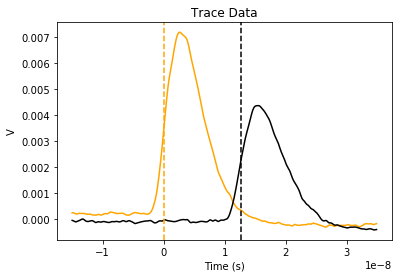

1.2578124999999997e-08

In [33]:
time_delay(time, filtered_p1, filtered_p2, fraction)

# Experimental Data for Different Delays

In [46]:
sigma = 3
fraction = 0.3

### 20 cm

time delay MAX MEASUREMENTS: 15.272 ns
time delay TRACE: 14.688 ns


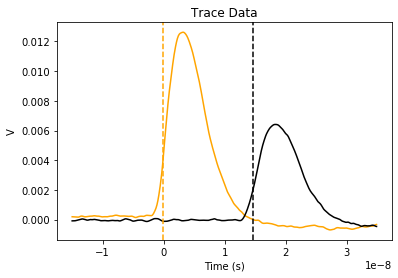

Absolute difference: 0.585 ns


In [47]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 20 cm/SNSL_sipm_delay_20_f.csv')

# TRACE
path = 'sensL sipm delays 20 cm/SNSL_sipm_trace_20_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2, fraction)


print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### 40 cm

time delay MAX MEASUREMENTS: 12.755 ns
time delay TRACE: 12.500 ns


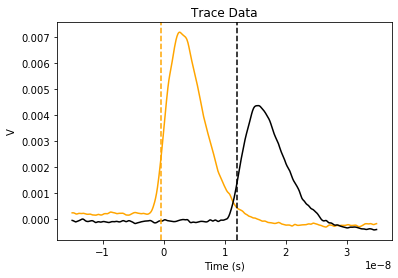

Absolute difference: 0.255 ns


In [49]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 40 cm/SNSL_sipm_delay_40_f.csv')

# TRACE
path = 'sensL sipm delays 40 cm/SNSL_sipm_trace_40_f'
num_shots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2, fraction)

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### 60 cm

time delay MAX MEASUREMENTS: 10.407 ns
time delay TRACE: 10.234 ns


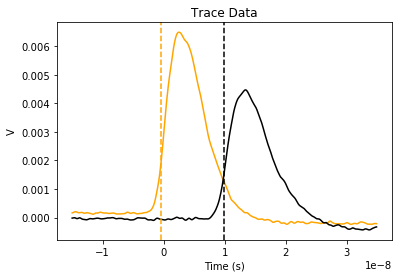

Absolute difference: 0.172 ns


In [50]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 60 cm/SNSL_sipm_delay_60_f.csv')

# TRACE
path = 'sensL sipm delays 60 cm/SNSL_sipm_trace_60_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2,fraction) 

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### 80 cm

time delay MAX MEASUREMENTS: 8.234 ns
time delay TRACE: 8.047 ns


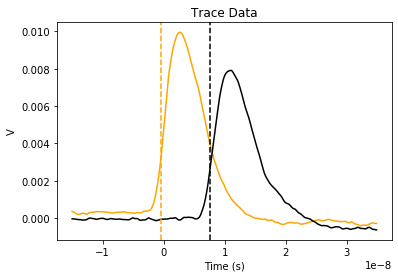

Absolute difference: 0.187 ns


In [51]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 80 cm/SNSL_sipm_delay_80_f.csv')

# TRACE
path = 'sensL sipm delays 80 cm/SNSL_sipm_trace_80_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2, fraction) 

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### 100 cm

time delay MAX MEASUREMENTS: 6.013 ns
time delay TRACE: 5.937 ns


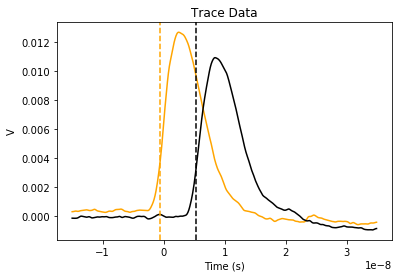

Absolute difference: 0.075 ns


In [52]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 100 cm/SNSL_sipm_delay_100_f.csv')

# TRACE
path = 'sensL sipm delays 100 cm/SNSL_sipm_trace_100_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2,fraction) 

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### 120 cm

time delay MAX MEASUREMENTS: 3.749 ns
time delay TRACE: 3.828 ns


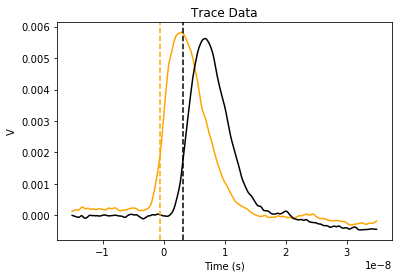

Absolute difference: 0.079 ns


In [53]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 120 cm/SNSL_sipm_delay_120_f.csv')

# TRACE
path = 'sensL sipm delays 120 cm/SNSL_sipm_trace_120_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2, fraction)

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

### ~150 cm

time delay MAX MEASUREMENTS: 3.037 ns
time delay TRACE: 3.125 ns


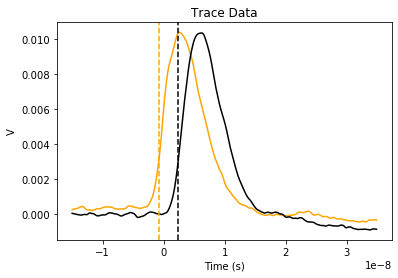

Absolute difference: 0.088 ns


In [54]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 150 cm/SNSL_sipm_delay_half_f.csv')

# TRACE
path = 'sensL sipm delays 150 cm/SNSL_sipm_trace_half_f'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2,fraction)

print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))

time delay MAX MEASUREMENTS: 15.190 ns
time delay TRACE: 14.695 ns


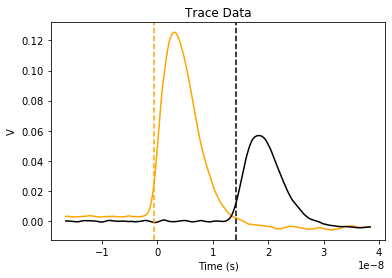

Absolute difference: 0.495 ns


In [64]:
# MAX DATA
td1 = average_max_times('sensL sipm delays 20 cm/SNSL_sipm_delay_20_2.csv')

# TRACE
path = 'sensL sipm delays 20 cm/SNSL_sipm_trace_20_3'
numshots = len([entry for entry in os.listdir(path) if os.path.isfile(os.path.join(path, entry))])
time, p1_avg, p2_avg = average_pulse(path, num_shots)


filtered_p1 = scipy.ndimage.gaussian_filter(p1_avg, sigma = sigma)
filtered_p2 = scipy.ndimage.gaussian_filter(p2_avg, sigma = sigma)

td2 = time_delay(time, filtered_p1, filtered_p2, 0.2)


print("Absolute difference: {:.3f} ns".format(abs(td1-td2) * 10 ** 9))